In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import dabest
from scipy.stats import chi2_contingency
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
from matplotlib_venn import venn3
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import SGDClassifier
from tqdm import tqdm

/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/Oliver/miniconda3/envs/hippnac/lib/python3.10/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Data preparation

In [2]:
comps = pd.read_feather('/Users/Oliver/Google Drive/hippnac/data/final_submission/comps.feather')
S = pd.read_hdf('/Users/Oliver/Google Drive/hippnac/data/final_submission/S.h5', 'S')
behaviour = pd.read_hdf('/Users/Oliver/Google Drive/hippnac/data/final_submission/375_behaviour.h5', 'behaviour')


# Fig 8B, S11A: proportions of significantly modulated neurons

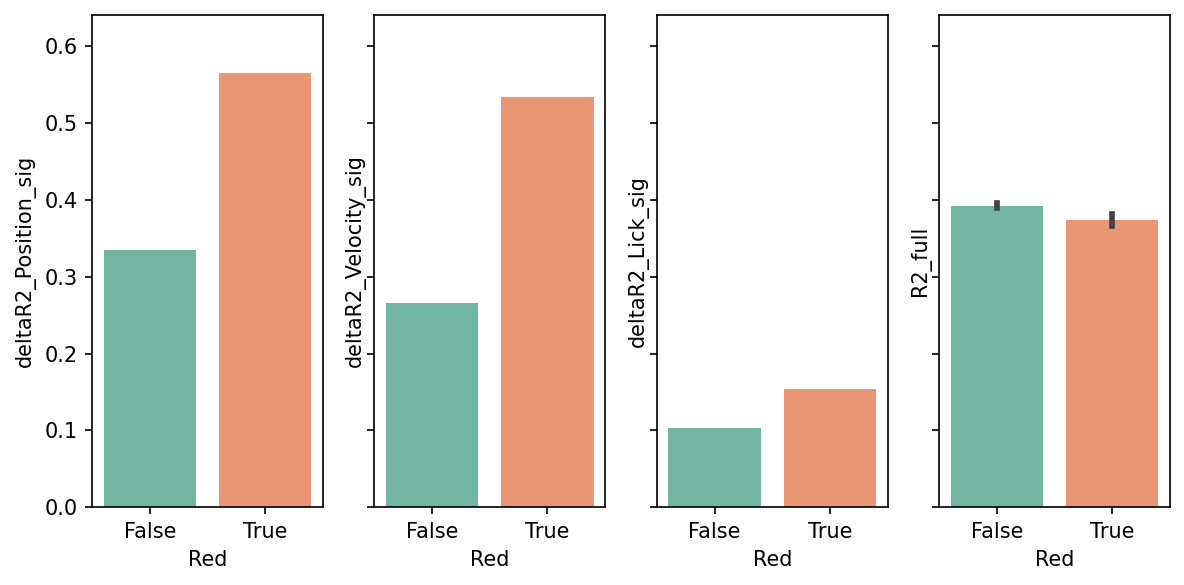

In [3]:
fig, axs = plt.subplots(1,4, figsize=(8,4), sharey=True)

sns.barplot(data=comps, x='Red', y='deltaR2_Position_sig', ax=axs[0], palette='Set2', errwidth=0)
sns.barplot(data=comps, x='Red', y='deltaR2_Velocity_sig', ax=axs[1], palette='Set2', errwidth=0)
sns.barplot(data=comps, x='Red', y='deltaR2_Lick_sig', ax=axs[2], palette='Set2', errwidth=0)
sns.barplot(data=comps, x='Red', palette='Set2', y='R2_full', ax=axs[3], ci=68)
fig.tight_layout()

In [4]:
print(pg.chi2_independence(data=comps, x='Red', y='deltaR2_Position_sig'))
print(pg.chi2_independence(data=comps, x='Red', y='deltaR2_Velocity_sig'))
print(pg.chi2_independence(data=comps, x='Red', y='deltaR2_Lick_sig'))

print(pg.ttest(comps.loc[comps.Red, 'R2_full'], comps.loc[~comps.Red, 'R2_full']))

(deltaR2_Position_sig            0            1
Red                                           
False                 3184.119136  1743.880864
True                   286.880864   157.119136, deltaR2_Position_sig       0       1
Red                                 
False                 3277.5  1650.5
True                   193.5   250.5,                  test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  93.633959  1.0  3.796183e-22  0.132023    1.0
1        cressie-read  0.666667  91.804858  1.0  9.565934e-22  0.130727    1.0
2      log-likelihood  0.000000  89.101457  1.0  3.750746e-21  0.128788    1.0
3       freeman-tukey -0.500000  87.853637  1.0  7.048150e-21  0.127883    1.0
4  mod-log-likelihood -1.000000  87.235991  1.0  9.631506e-21  0.127432    1.0
5              neyman -2.000000  87.818647  1.0  7.173943e-21  0.127857    1.0)
(deltaR2_Velocity_sig            0            1
Red                                           
False       

# Fig S11D-G

In [5]:
comps['RedC'] = 'Green'
comps.loc[comps.Red==1, 'RedC'] = 'Red'

comps['deltaR2_Position_sig'] = comps.deltaR2_Position_sig.astype(int)
deltaR2_Position_sig_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='deltaR2_Position_sig', resamples=5000, proportional=True)
deltaR2_Position_sig_dabest.cohens_h.statistical_tests

In [ ]:
comps['deltaR2_Velocity_sig'] = comps.deltaR2_Velocity_sig.astype(int)
deltaR2_Velocity_sig_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='deltaR2_Velocity_sig', resamples=5000, proportional=True)
deltaR2_Velocity_sig_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.555954,95,0.460171,0.653014,0.0,3.604438e-25,-10.943697,2.102567e-33,-12.125696,5.477555e-33,800424.0


In [ ]:
comps['deltaR2_Lick_sig'] = comps.deltaR2_Lick_sig.astype(int)
deltaR2_Lick_sig_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='deltaR2_Lick_sig', resamples=5000, proportional=True)
deltaR2_Lick_sig_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.149811,95,0.051352,0.24782,0.0012,0.004916,-2.82505,0.00115,-3.252836,0.001154,1039462.0


In [ ]:
pg.normality(comps.R2_full, method='normaltest')

,W,pval,normal
R2_full,889.509339,7.006502e-194,False


In [ ]:
R2_full_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='R2_full', resamples=5000)
R2_full_dabest.median_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_kruskal,statistic_kruskal
0,Green,Red,4928,444,median difference,None,0.02624,95,0.003313,0.042059,0.0236,0.218225,1.516005


In [ ]:
comps.groupby('Red').median()['R2_full']

Red
False    0.332979
True     0.359219
Name: R2_full, dtype: float64

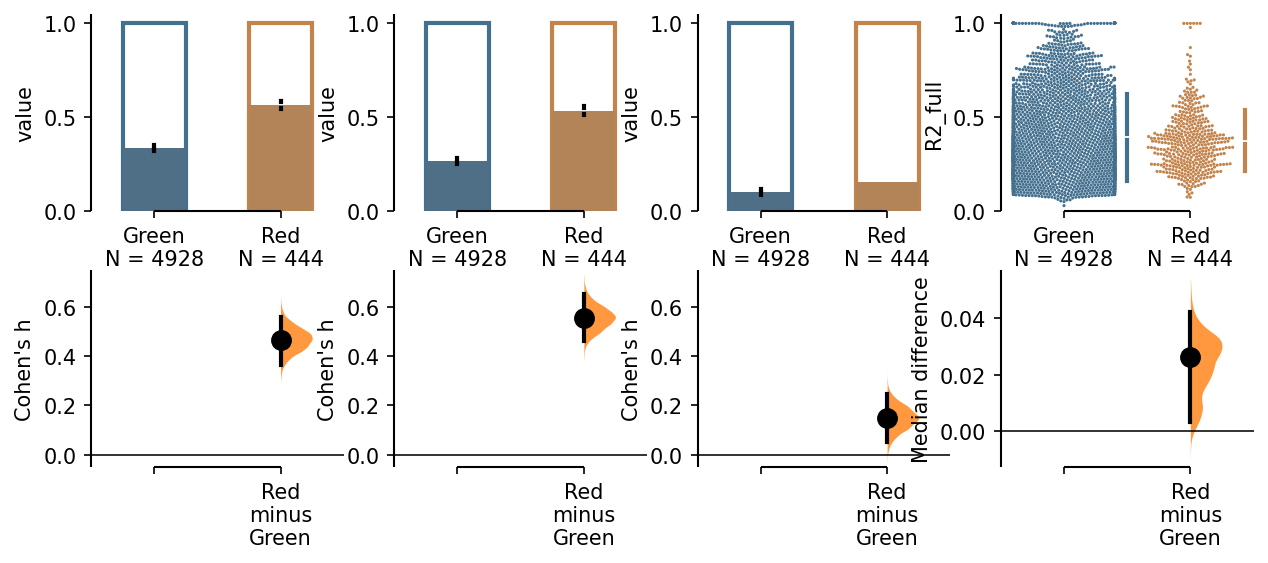

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,4), sharey=True)

deltaR2_Position_sig_dabest.cohens_h.plot(float_contrast=False, ax=axs[0], contrast_ylim=(-0.05, 0.75));
deltaR2_Velocity_sig_dabest.cohens_h.plot(float_contrast=False, ax=axs[1], contrast_ylim=(-0.05, 0.75));
deltaR2_Lick_sig_dabest.cohens_h.plot(float_contrast=False, ax=axs[2], contrast_ylim=(-0.05, 0.75));
R2_full_dabest.median_diff.plot(float_contrast=False, ax=axs[3], raw_marker_size=1.5);


# Fig S11C: avg deltaR2 values

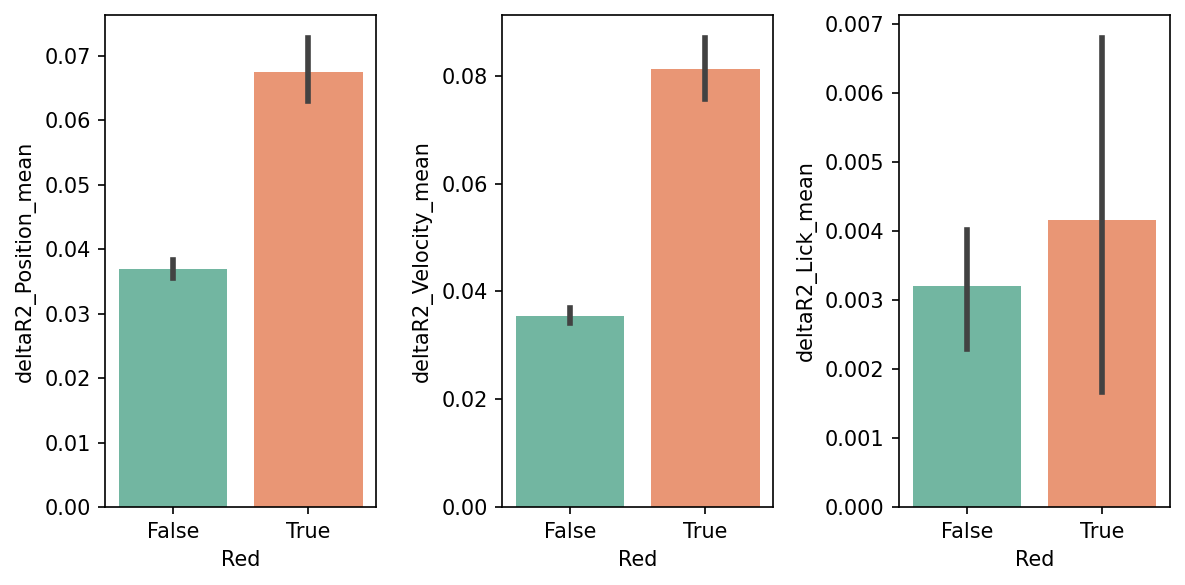

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(8,4))

sns.barplot(data=comps, x='Red', y='deltaR2_Position_mean', ax=axs[0], palette='Set2', ci=68)

sns.barplot(data=comps, x='Red', y='deltaR2_Velocity_mean', ax=axs[1], palette='Set2', ci=68)

sns.barplot(data=comps, x='Red', y='deltaR2_Lick_mean', ax=axs[2], palette='Set2', ci=68)

fig.tight_layout()

In [ ]:
print(pg.ttest(comps.loc[comps.Red, 'deltaR2_Position_mean'], comps.loc[~comps.Red, 'deltaR2_Position_mean']))
print(pg.ttest(comps.loc[comps.Red, 'deltaR2_Velocity_mean'], comps.loc[~comps.Red, 'deltaR2_Velocity_mean']))
print(pg.ttest(comps.loc[comps.Red, 'deltaR2_Lick_mean'], comps.loc[~comps.Red, 'deltaR2_Lick_mean']))

               T         dof alternative         p-val         CI95%  \
T-test  5.984106  523.227386   two-sided  4.039895e-09  [0.02, 0.04]   

         cohen-d       BF10  power  
T-test  0.300648  2.679e+06    1.0  
               T         dof alternative         p-val         CI95%  \
T-test  7.704171  497.690162   two-sided  7.182494e-14  [0.03, 0.06]   

         cohen-d       BF10  power  
T-test  0.451705  2.861e+11    1.0  
               T         dof alternative     p-val         CI95%   cohen-d  \
T-test  0.362602  552.632982   two-sided  0.717041  [-0.0, 0.01]  0.016079   

         BF10     power  
T-test  0.059  0.062144  


# Fig S11B: Scaled importance

               T         dof alternative     p-val           CI95%   cohen-d  \
T-test -2.368035  498.244607   two-sided  0.018264  [-1.69, -0.16]  0.138279   

         BF10     power  
T-test  0.894  0.796803  
               T         dof alternative         p-val           CI95%  \
T-test -8.646881  617.623198   two-sided  4.553226e-17  [-0.28, -0.18]   

         cohen-d       BF10  power  
T-test  0.320285  5.478e+14    1.0  
               T         dof alternative         p-val          CI95%  \
T-test -8.122665  592.799715   two-sided  2.657223e-15  [-0.2, -0.12]   

         cohen-d       BF10  power  
T-test  0.318886  7.376e+12    1.0  


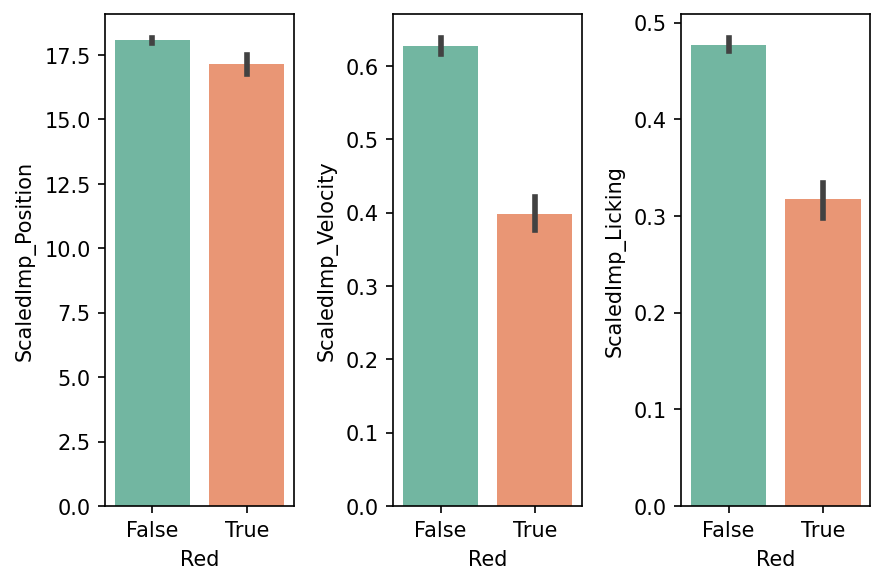

In [ ]:
fig, axs = plt.subplots(1,3)
sns.barplot(data=comps, x='Red', y='ScaledImp_Position', ax=axs[0], ci=68, palette='Set2')
sns.barplot(data=comps, x='Red', y='ScaledImp_Velocity', ax=axs[1], ci=68, palette='Set2')
sns.barplot(data=comps, x='Red', y='ScaledImp_Licking', ax=axs[2], ci=68, palette='Set2')
print(pg.ttest(comps.loc[comps.Red, 'ScaledImp_Position'], comps.loc[~comps.Red, 'ScaledImp_Position']))
print(pg.ttest(comps.loc[comps.Red, 'ScaledImp_Velocity'], comps.loc[~comps.Red, 'ScaledImp_Velocity']))
print(pg.ttest(comps.loc[comps.Red, 'ScaledImp_Licking'], comps.loc[~comps.Red, 'ScaledImp_Licking']))

fig.tight_layout()

# Fig 8D: Venn diagram of GLM classification

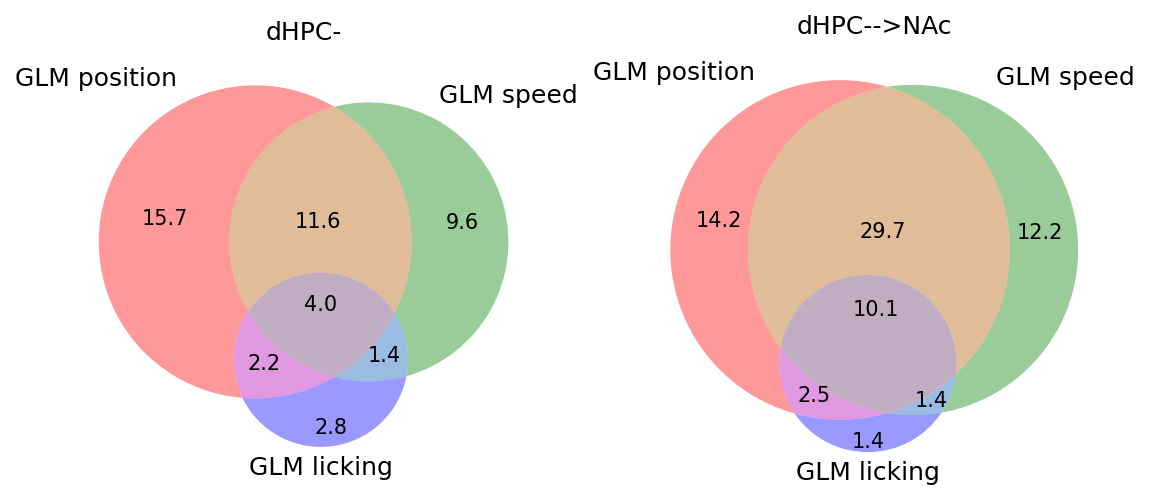

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(9,6))

#Abc, aBc, ABc, abC, AbC, aBC, ABC)

venn3(subsets = (
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==False)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[~comps.Red].count()[0])*100, 1)
),
      set_labels = ('GLM position', 'GLM speed', 'GLM licking'), ax=axs[0])
axs[0].set_title('dHPC-');


venn3(subsets = (
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==False)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==False)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==False)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1),
      round((comps.loc[(comps.Red==True)&(comps.deltaR2_Position_sig==True)&(comps.deltaR2_Velocity_sig==True)&(comps.deltaR2_Lick_sig==True)].count()[0] / comps.loc[comps.Red].count()[0])*100, 1)
),
      set_labels = ('GLM position', 'GLM speed', 'GLM licking'), ax=axs[1])
axs[1].set_title('dHPC-->NAc');

# Fig 8C: Conjunctive coding

In [ ]:
comps['GLM_pos_speed'] = comps['deltaR2_Position_sig'] * comps['deltaR2_Velocity_sig']
comps['GLM_pos_lick'] = comps['deltaR2_Position_sig'] * comps['deltaR2_Lick_sig']
comps['GLM_speed_lick'] = comps['deltaR2_Velocity_sig'] * comps['deltaR2_Lick_sig']
comps['GLM_pos_speed_lick'] = comps['deltaR2_Position_sig']* comps['deltaR2_Velocity_sig'] * comps['deltaR2_Lick_sig']

(GLM_pos_speed            0           1
Red                                   
False          4061.104989  866.895011
True            365.895011   78.104989, GLM_pos_speed       0      1
Red                         
False          4159.5  768.5
True            267.5  176.5,                  test    lambda        chi2  dof          pval    cramer  \
0             pearson  1.000000  163.968027  1.0  1.537257e-37  0.174708   
1        cressie-read  0.666667  152.343163  1.0  5.331208e-35  0.168401   
2      log-likelihood  0.000000  134.194202  1.0  4.954438e-31  0.158052   
3       freeman-tukey -0.500000  124.088993  1.0  8.054877e-29  0.151984   
4  mod-log-likelihood -1.000000  116.301963  1.0  4.081681e-27  0.147138   
5              neyman -2.000000  105.971552  1.0  7.480136e-25  0.140452   

   power  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0  
5    1.0  )
(GLM_pos_lick            0           1
Red                                  
False         4597.754281  330.245719

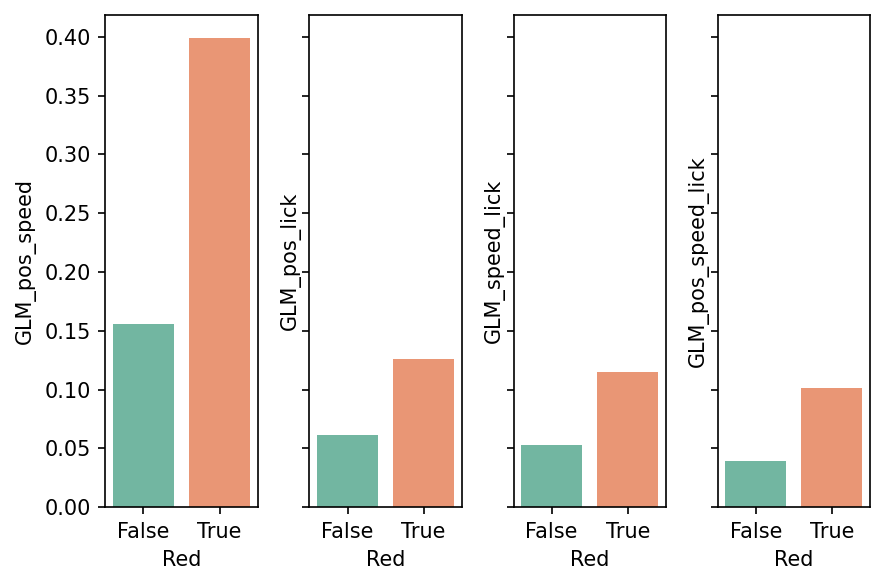

In [ ]:
comps['GLM_pos_speed'] = comps['deltaR2_Position_sig'] * comps['deltaR2_Velocity_sig']
comps['GLM_pos_lick'] = comps['deltaR2_Position_sig'] * comps['deltaR2_Lick_sig']
comps['GLM_speed_lick'] = comps['deltaR2_Velocity_sig'] * comps['deltaR2_Lick_sig']
comps['GLM_pos_speed_lick'] = comps['deltaR2_Position_sig']* comps['deltaR2_Velocity_sig'] * comps['deltaR2_Lick_sig']

print(pg.chi2_independence(comps, x='Red', y='GLM_pos_speed'))
print(pg.chi2_independence(comps, x='Red', y='GLM_pos_lick'))
print(pg.chi2_independence(comps, x='Red', y='GLM_speed_lick'))

print(pg.chi2_independence(comps, x='Red', y='GLM_pos_speed_lick'))

fig, axs = plt.subplots(1,4, sharey=True)
sns.barplot(data=comps, x='Red', y='GLM_pos_speed', ax=axs[0], ci=None, palette='Set2')
sns.barplot(data=comps, x='Red', y='GLM_pos_lick', ax=axs[1], ci=None, palette='Set2')
sns.barplot(data=comps, x='Red', y='GLM_speed_lick', ax=axs[2], ci=None, palette='Set2')
sns.barplot(data=comps, x='Red', y='GLM_pos_speed_lick', ax=axs[3], ci=None, palette='Set2')

fig.tight_layout()


In [ ]:
comps['conjunctive_n'] = 0
comps.loc[(comps.deltaR2_Position_sig), 'conjunctive_n'] += 1
comps.loc[(comps.deltaR2_Velocity_sig), 'conjunctive_n'] += 1
comps.loc[(comps.deltaR2_Lick_sig), 'conjunctive_n'] += 1

In [ ]:
comps[['deltaR2_Position_sig', 'deltaR2_Velocity_sig', 'deltaR2_Lick_sig', 'GLM_pos_speed', 'GLM_pos_lick', 'GLM_speed_lick', 'GLM_pos_speed_lick']] = comps[['deltaR2_Position_sig', 'deltaR2_Velocity_sig', 'deltaR2_Lick_sig', 'GLM_pos_speed', 
    'GLM_pos_lick', 'GLM_speed_lick', 'GLM_pos_speed_lick']].astype(int)
comps.groupby('Red').sum()[['deltaR2_Position_sig', 'deltaR2_Velocity_sig', 'deltaR2_Lick_sig', 'GLM_pos_speed', 
    'GLM_pos_lick', 'GLM_speed_lick', 'GLM_pos_speed_lick']]

,deltaR2_Position_sig,deltaR2_Velocity_sig,deltaR2_Lick_sig,GLM_pos_speed,GLM_pos_lick,GLM_speed_lick,GLM_pos_speed_lick
Red,,,,,,,
False,1650,1308,509,768,304,262,195
True,251,237,68,177,56,51,45


# Fig S11K-H

In [ ]:
comps.GLM_pos_speed = comps.GLM_pos_speed.astype(float)
GLM_pos_speed_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='GLM_pos_speed', resamples=5000, proportional=True)
GLM_pos_speed_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.555042,95,0.456274,0.653042,0.0,3.109838e-22,-10.189216,1.859305e-38,-13.070761,6.740053e-38,828384.0


In [ ]:
comps.GLM_pos_lick = comps.GLM_pos_lick.astype(float)
GLM_pos_lick_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='GLM_pos_lick', resamples=5000, proportional=True)
GLM_pos_lick_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.224136,95,0.127388,0.321765,0.0,0.000076,-3.992059,1.926873e-07,-5.213077,1.988780e-07,1023520.0


In [ ]:
comps.GLM_speed_lick = comps.GLM_speed_lick.astype(float)
GLM_speed_lick_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='GLM_speed_lick', resamples=5000, proportional=True)
GLM_speed_lick_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.226191,95,0.127464,0.322651,0.0,0.000078,-3.984976,1.028619e-07,-5.328866,1.064889e-07,1026516.0


In [ ]:
comps.GLM_pos_speed_lick = comps.GLM_pos_speed_lick.astype(float)
GLM_pos_speed_lick_dabest = dabest.load(comps, idx=("Green", "Red"), x='RedC', \
    y='GLM_pos_speed_lick', resamples=5000, proportional=True)
GLM_pos_speed_lick_dabest.cohens_h.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,Green,Red,4928,444,Cohen's h,None,0.247477,95,0.150986,0.344704,0.0,0.000028,-4.230125,1.501135e-09,-6.05482,1.591851e-09,1026426.0


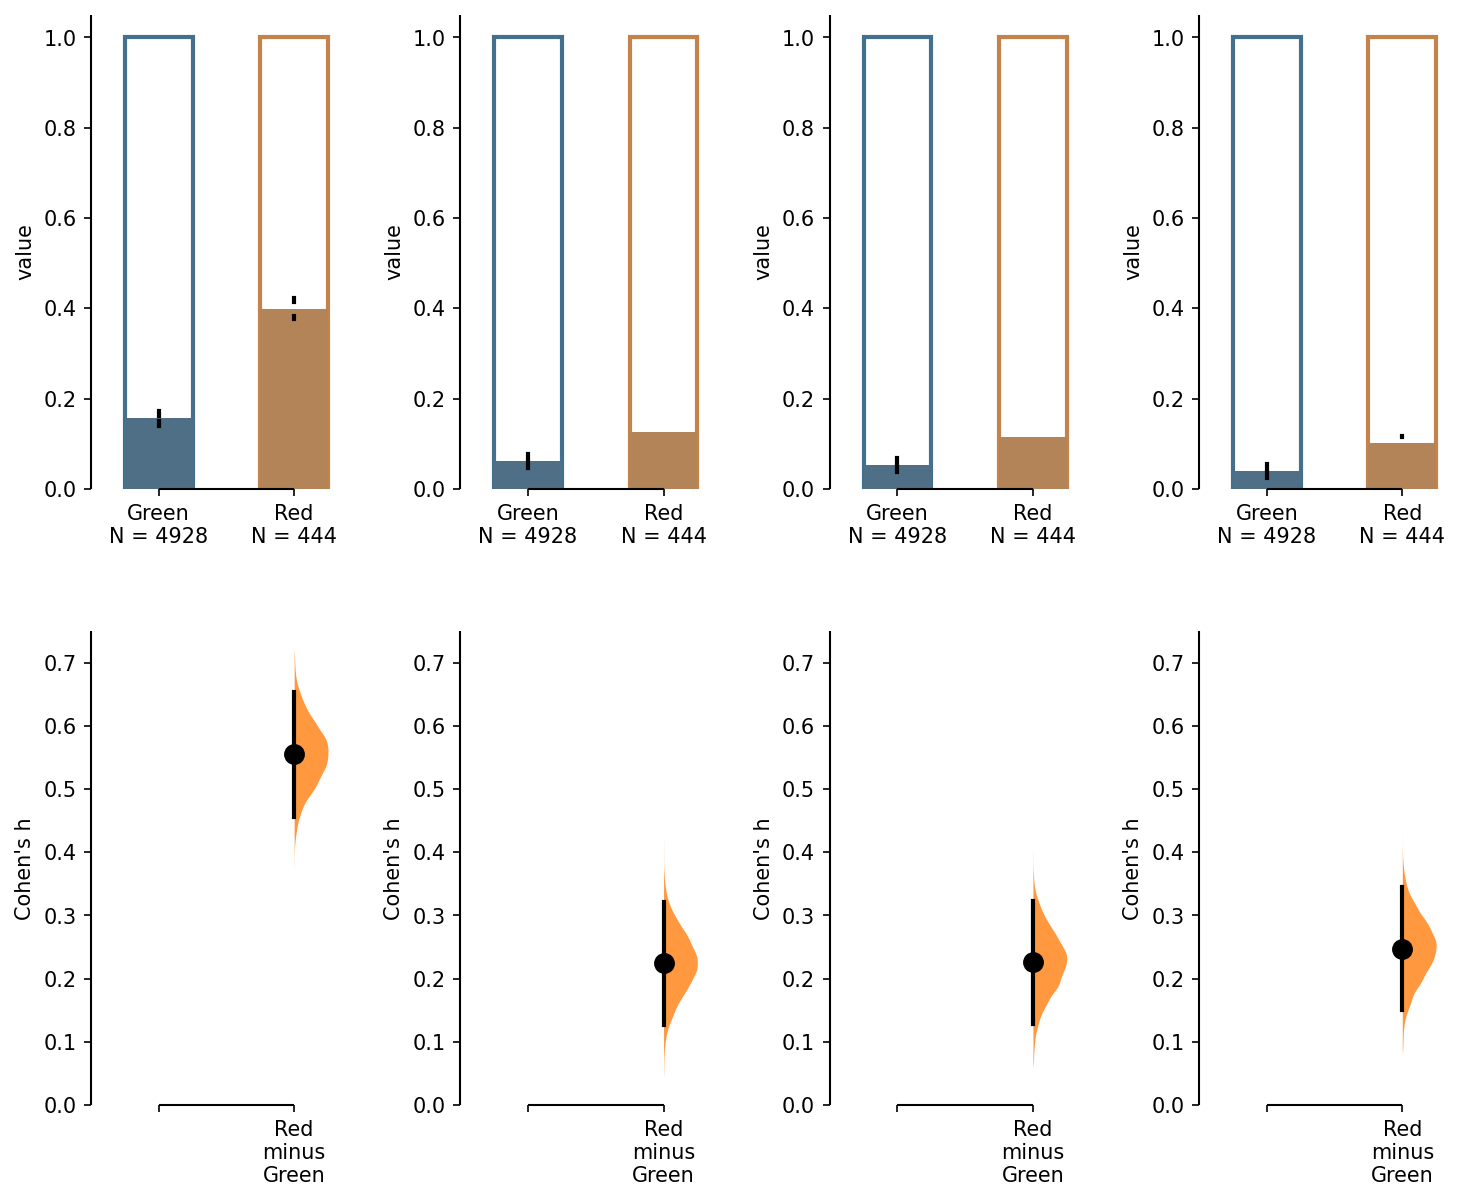

In [ ]:
fig, axs = plt.subplots(1,4, figsize=(10,4), sharey=True)

GLM_pos_speed_dabest.cohens_h.plot(float_contrast=False, ax=axs[0], contrast_ylim=(0, 0.75));
GLM_pos_lick_dabest.cohens_h.plot(float_contrast=False, ax=axs[1], contrast_ylim=(0, 0.75));
GLM_speed_lick_dabest.cohens_h.plot(float_contrast=False, ax=axs[2], contrast_ylim=(0, 0.75));
GLM_pos_speed_lick_dabest.cohens_h.plot(float_contrast=False, ax=axs[3], contrast_ylim=(0, 0.75));
fig.tight_layout()

# Fig 8E: conjunctive feature counts

In [ ]:
comps['conjunctive_n'] = 0
comps.loc[(comps.deltaR2_Position_sig==1), 'conjunctive_n'] += 1
comps.loc[(comps.deltaR2_Velocity_sig==1), 'conjunctive_n'] += 1
comps.loc[(comps.deltaR2_Lick_sig==1), 'conjunctive_n'] += 1
comps[['deltaR2_Position_sig', 'deltaR2_Velocity_sig', 'deltaR2_Lick_sig', 'conjunctive_n']]

,deltaR2_Position_sig,deltaR2_Velocity_sig,deltaR2_Lick_sig,conjunctive_n
0,0,1,0,1
1,1,1,1,3
2,1,1,0,2
3,0,0,0,0
4,0,1,0,1
...,...,...,...,...
5367,0,0,0,0
5368,1,0,0,1
5369,0,0,0,0
5370,0,0,0,0


In [ ]:
conjunctives = comps.groupby(['Red', 'conjunctive_n']).count()['ExpID'].reset_index()
conjunctives.loc[~(conjunctives.Red), 'percentage'] = conjunctives.loc[~(conjunctives.Red), 'ExpID'] / conjunctives.loc[~(conjunctives.Red), 'ExpID'].sum()
conjunctives.loc[(conjunctives.Red), 'percentage'] = conjunctives.loc[(conjunctives.Red), 'ExpID'] / conjunctives.loc[(conjunctives.Red), 'ExpID'].sum()
conjunctives.loc[~(conjunctives.Red), 'total_n'] = conjunctives.loc[~(conjunctives.Red), 'ExpID'].sum().astype(int)
conjunctives.loc[(conjunctives.Red), 'total_n'] = conjunctives.loc[(conjunctives.Red), 'ExpID'].sum().astype(int)

conjunctives

,Red,conjunctive_n,ExpID,percentage,total_n
0,False,0,2600,0.527597,4928.0
1,False,1,1384,0.280844,4928.0
2,False,2,749,0.151989,4928.0
3,False,3,195,0.039570,4928.0
4,True,0,127,0.286036,444.0
5,True,1,123,0.277027,444.0
6,True,2,149,0.335586,444.0
7,True,3,45,0.101351,444.0


In [ ]:
chi2_contingency(conjunctives.loc[conjunctives.conjunctive_n==0, ['ExpID', 'total_n']])

(35.38151420016098,
 2.7104723648873936e-09,
 1,
 array([[2534.73959748, 4993.26040252],
        [ 192.26040252,  378.73959748]]))

In [ ]:
chi2_contingency(conjunctives.loc[conjunctives.conjunctive_n==1, ['ExpID', 'total_n']])

(0.005729690070467275,
 0.9396619797443685,
 1,
 array([[1382.78587004, 4929.21412996],
        [ 124.21412996,  442.78587004]]))

In [ ]:
chi2_contingency(conjunctives.loc[conjunctives.conjunctive_n==2, ['ExpID', 'total_n']])

(61.33590780213834,
 4.812233247556924e-15,
 1,
 array([[ 813.06953748, 4863.93046252],
        [  84.93046252,  508.06953748]]))

In [ ]:
chi2_contingency(conjunctives.loc[conjunctives.conjunctive_n==3, ['ExpID', 'total_n']])

(30.446865328518925,
 3.4313734974847235e-08,
 1,
 array([[ 219.08766928, 4903.91233072],
        [  20.91233072,  468.08766928]]))

Text(0.5, 1.0, 'dHPC->NAc')

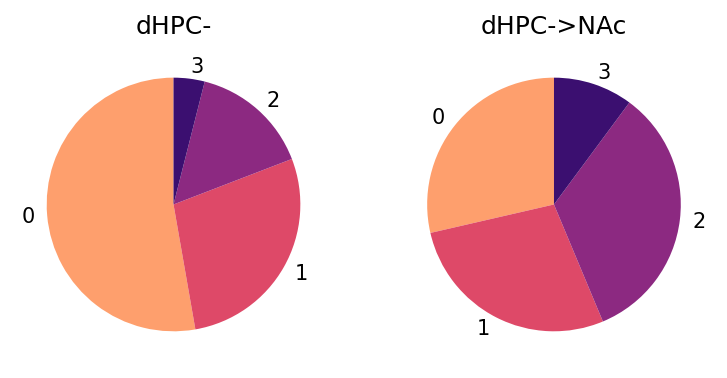

In [ ]:
comps['conjunctive_n_str'] = comps['conjunctive_n'].astype(str)
conjunctives = comps.groupby(['Red', 'conjunctive_n_str']).count()['ExpID'].reset_index()

fig, axs = plt.subplots(1,2)
axs[0].pie(conjunctives.loc[~(conjunctives.Red), 'ExpID'], labels=conjunctives.loc[~(conjunctives.Red), 'conjunctive_n_str'],
    startangle=90, colors=sns.mpl_palette("magma_r", 4));
axs[0].set_title('dHPC-')
axs[1].pie(conjunctives.loc[(conjunctives.Red), 'ExpID'], labels=conjunctives.loc[(conjunctives.Red), 'conjunctive_n_str'],
    startangle=90, colors=sns.mpl_palette("magma_r", 4));
axs[1].set_title('dHPC->NAc')


# Fig 8G

In [ ]:
# FUNCTIONS

def ds_data(S_, binarise, beh, ds_sec, velothresh=2, bins=45):
    # binarise events (discard amplitude information)
    if binarise:
        S_ = (S_>0).astype(float)
    else:
        S_ = pd.DataFrame(S_)
        S_[S_>0] = S.apply(lambda x: pd.qcut(x[x>0], 10, labels=False))  # quantiles
        S_ = S_.values

    # Velocity below 2cm/s is NANed
    S_[(beh.Velocity_ds<velothresh),:] = np.nan
    beh[(beh.Velocity_ds<velothresh)] = np.nan

    # downsampling
    beh['Time_ds'] = round(beh.Time_s / ds_sec)
    S_ds = pd.DataFrame(S_).join(beh.Time_ds).groupby('Time_ds').sum().values
    beh_ds = beh.groupby('Time_ds').median().reset_index()
    beh_ds.Lap = round(beh_ds.Lap)
    beh_ds['Pump'] = beh.groupby('Time_ds').max().reset_index()['Pump']

    # kicking out NANs at Position
    S_ds = S_ds[beh_ds.loc[~beh_ds.Position.isnull()].index, :]
    beh_ds = beh_ds.loc[~beh_ds.Position.isnull()].reset_index(drop=True)

    # bin position
    beh_ds['PosBin'] = pd.cut(beh_ds.Position, bins, labels=False)
    beh_ds['VeloBin'] = pd.cut(beh_ds.Velocity_ds, bins, labels=False)

    # discretise reward zone
    beh_ds['RewZone'] = (beh_ds.Position>330).astype(int)
    beh_ds['AntZone'] = ((beh_ds.Position>300)&(beh_ds.Position<330)).astype(int)
    beh_ds['RewAntZone'] = (beh_ds.Position>300).astype(int)

    # define lap success
    lapsuccess = beh_ds.groupby('Lap').max()['Pump'].rename('LapSuccess')
    beh_ds = beh_ds.join(lapsuccess, on='Lap')
    
    return S_ds, beh_ds


def train_test(S_ds, beh_ds, comps_, red=0, eventthresh=10, train_odd_laps=1, random_state=1):    
    # set 'red_events' to NaN for neurons with less than X event bins
    comps_['Red_events'] = comps_.Red
    comps_.loc[(np.sum(S_ds>0, axis=0)<eventthresh), 'Red_events'] = np.nan
    
    # pick only red/green cells with more than X events
    if red==1:
        if comps_.Red_events.sum() > len(comps_.loc[~comps_.Red]):
            S_ds = S_ds[:, comps_.loc[(comps_.Red_events==1)].sample(len(comps_.loc[~comps_.Red]), random_state=random_state).index]
        else:
            S_ds = S_ds[:, (comps_.Red_events==1)]  # red
    elif red==0:  # sample-size-matched green neurons
        if comps_.Red_events.sum() > len(comps_.loc[~comps_.Red]):
            S_ds = S_ds[:, (comps_.Red==0)]  # green
        else:
            S_ds = S_ds[:, comps_.loc[(comps_.Red==0)].sample(comps_.Red_events.sum(), random_state=random_state).index]  # green same randomised sample number
    elif red==-1:  # non-sample-size-matched green neurons
        S_ds = S_ds[:, (comps_.Red==0)]
    else:
        S_ds = S_ds[:, (comps_.Red_events<2)]  # all cells with more than X events
        
    # split into train/test 50/50 by laps, (discard first and last lap)
    if train_odd_laps:
        trainidx = np.where(~(beh_ds.Lap%2).astype(bool))[0]# & ~(pd.Series(beh_ds.Lap).isin([beh_ds.loc[0, 'Lap'], beh_ds.Lap.iloc[-1]])).values)[0]
        testidx = np.where((beh_ds.Lap%2).astype(bool))[0]# & ~(pd.Series(beh_ds.Lap).isin([beh_ds.loc[0, 'Lap'], beh_ds.Lap.iloc[-1]])).values)[0]
    else:
        trainidx = np.where((beh_ds.Lap%2).astype(bool))[0]# & ~(pd.Series(beh_ds.Lap).isin([beh_ds.loc[0, 'Lap'], beh_ds.Lap.iloc[-1]])).values)[0]
        testidx = np.where(~(beh_ds.Lap%2).astype(bool))[0]# & ~(pd.Series(beh_ds.Lap).isin([beh_ds.loc[0, 'Lap'], beh_ds.Lap.iloc[-1]])).values)[0]
    
    S_train = S_ds[trainidx, :]
    beh_train = beh_ds.loc[trainidx].reset_index()

    S_test = S_ds[testidx, :]
    beh_test = beh_ds.loc[testidx].reset_index()
    
    return S_train, beh_train, S_test, beh_test

In [ ]:
comps_exp['Red'].sum()

54

In [ ]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

predictions_all = pd.DataFrame()

exps = [100, 103, 117, 125, 126, 127, 136, 137, 139, 140, 142, 143, 144, 148, 152, 154, 156, 163, 166]
for expid in exps:
    print(expid)
    S_exp = S[expid].drop(['PositionBin', 'Lap'], axis=1).dropna().values
    beh = behaviour.loc[expid, ['Position', 'Lap', 'Velocity_ds', 'Time_s', 'Pump']]
    comps_exp = comps.loc[comps.ExpID==expid].reset_index(drop=True)
    comps_exp['Red'] = (comps_exp['conjunctive_n']>1).astype(bool).values # instead of "Red", look at conjunctive coding neurons
    n_red = comps_exp.Red.sum()
    n = comps_exp.count()[0]
    ds_sec = 1
    bins = 45

    # downsample:
    S_ds, beh_ds = ds_data(S_exp, True, beh, ds_sec, velothresh=2, bins=bins)

    for r in [0, 1, 'all']:  # green then red neurons
        n_shuffle = 100 if r==0 else 1  # 100x shuffling of green neurons
        for s in tqdm(range(n_shuffle)):
            for k in [0, 1]:  # two-fold cross-validation
                clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5, random_state = 42)

                # split data set:
                S_train, beh_train, S_test, beh_test = train_test(S_ds, beh_ds, comps_exp, red=r, eventthresh=10, train_odd_laps=k, random_state=s)
                clf.fit(S_train, beh_train['RewZone']) 

                # predict:
                predictions = pd.Series()
                predictions['r2'] = clf.score(S_test, beh_test['RewZone'])
                predictions['k'] = k
                predictions['r'] = r
                predictions['s'] = s
                predictions['expid'] = str(expid)
                predictions['n'] = n_red if type(r)==int else n
                predictions_all = pd.concat([predictions_all, predictions], axis=1)

predictions_all = predictions_all.T

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 18.77it/s]


Text(0.5, 0, 'Conjunctive')

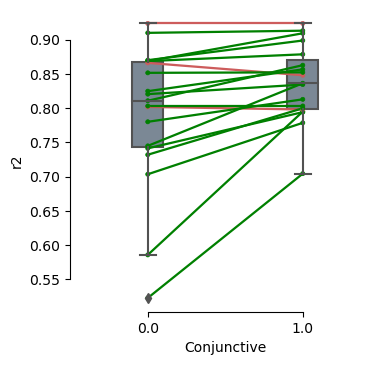

In [ ]:
predictions_exps = predictions_all.groupby(['expid', 'r']).mean().reset_index()
predictions_exps['r'] = predictions_exps['r'].astype(str)
pg.plot_paired(data=predictions_exps.loc[~(predictions_exps.r=='all')], dv='r2', within='r', subject='expid'
               ).set_xlabel('Conjunctive')

In [ ]:
pg.wilcoxon(predictions_exps.loc[predictions_exps.r=='0.0', 'r2'], predictions_exps.loc[predictions_exps.r=='1.0', 'r2'])


,W-val,alternative,p-val,RBC,CLES
Wilcoxon,14.0,two-sided,0.00042,-0.852632,0.396122
